In [108]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [109]:
data = pd.read_csv('Lab8 2b Green.csv')
data = pd.DataFrame(data).to_numpy()
amps_raw = data[:,1]
volt_1 = data[:,2]
volt_2 = data[:,3]

volts = volt_1-volt_2
amps = amps_raw - amps_raw[0]


In [110]:
def diode(x, I, B):
    return I * (np.exp(x / B) - 1)

def lin(x, m, b):
    return m * x + b


In [111]:
lin_opt, lin_cov = opt.curve_fit(diode, volts, amps)

I, B = lin_opt
dm, db = np.sqrt(np.diag(lin_cov))

I

2.0179803925474218e-13

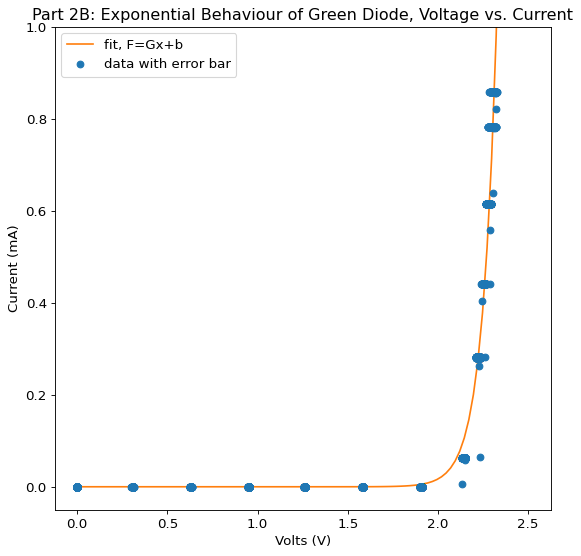

In [112]:
fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

plt.errorbar(volts, amps, label="data with error bar", fmt='o')
plt.plot(np.linspace(0,2.5,100), diode(np.linspace(0,2.5,100), I, B), label='fit, F=Gx+b', color='tab:orange')

plt.title("Part 2B: Exponential Behaviour of Green Diode, Voltage vs. Current")
plt.xlabel("Volts (V)")
plt.ylabel("Current (mA)")
plt.ylim(-0.05,1)

plt.legend(loc=2)
plt.show()